# Wikidata Tables FDA

### Import dependencies

In [1]:
import pandas as pd
import gzip
import json
import matplotlib.pyplot as plt
import os
import seaborn as sns
import langid

### Read Tables and store them in a dictionary {"Table_name": table_df}

In [2]:
# Read all tables and store them in dfs list
dfs = {}
tables_path = "Dataset/Valid/tables/"
files = os.listdir(tables_path)
for file in files:
    df = pd.read_csv(tables_path + file)
    dfs[file] = df

In [3]:
dfs.keys()

dict_keys(['03ENJ6XM.csv', '08IZY6G9.csv', '0CZW7M0F.csv', '0DYQDSCY.csv', '0ER7T81U.csv', '0JGLUKC7.csv', '0JLTIHOL.csv', '0LBWW5L4.csv', '0N0NEYH9.csv', '0N5SQTLA.csv', '0OE5OCRQ.csv', '0WE6LMVO.csv', '0WPFA2SX.csv', '0WR8HB5F.csv', '10BWA0TL.csv', '10NIEV07.csv', '15MW7OIW.csv', '16WN39MK.csv', '17ZWOR3H.csv', '1FC2QYZ7.csv', '1KXJTLWQ.csv', '1MU06NLK.csv', '1NLZ9DZM.csv', '1P13VPP7.csv', '1Q9AQVZ4.csv', '1RLHV3VU.csv', '1S6DNZQZ.csv', '1V4KDGGZ.csv', '1W08NBUM.csv', '1XE9BS7D.csv', '1Z7TZO5Y.csv', '1ZBSGT5O.csv', '22RW4XSQ.csv', '28LTVSGN.csv', '28NX4BKN.csv', '298K62MT.csv', '29PJJKO1.csv', '2AX6EPDA.csv', '2CRZ98JZ.csv', '2D218JBS.csv', '2F8S19XX.csv', '2HLB6GPC.csv', '2JE2A69L.csv', '2KSWHXRR.csv', '2SAD93QZ.csv', '2SLP036H.csv', '2VVLNDA8.csv', '2XTQDLHR.csv', '37O08NT0.csv', '39DKHTFY.csv', '3EXEASJX.csv', '3F3A8IY2.csv', '3LRK5GZX.csv', '3NS7HOL5.csv', '3PP6R2LE.csv', '3Q8MYFHL.csv', '3S53OZSF.csv', '3X518GM9.csv', '3YQSKSKG.csv', '43C8NJEG.csv', '446GOT7F.csv', '44WXF9VM.csv

In [4]:
dfs['03ENJ6XM.csv'].head()

,col0,col1,col2
0,Bryngwyn,250.5,95.9
1,Castell Dinas Bran,321.4,96.2
2,Mynydd Mawr,160.0,96.0
3,Skid Hill,186.0,98.0
4,Sokol,668.0,100.0


In [5]:
dfs['WW0HANTJ.csv'].head()

,col0,col1,col2
0,USS Halsey,NaN,Arleigh Burke-class destroyer
1,USS Barry,John Barry,Arleigh Burke-class destroyer
2,USS Mason,NaN,Arleigh Burke-class destroyer
3,USS Richard E. Byrd,Richard E. Byrd,Charles F. Adams-class destroyer
4,USS Kidd,Isaac C. Kidd,Kidd-class destroyer


In [6]:
print(f"Total number of tables in Valid dataset are: {len(dfs)}")

Total number of tables in Valid dataset are: 500


In [7]:
# Number of unique labels for CEA in Valid dataset
cea_gt = pd.read_csv("Dataset/Valid/gt/cea_gt.csv", header=None)
cea_gt.iloc[:, 3].nunique()
print(f"The number of values annotated is: {cea_gt.shape[0]}")
print(f"The number of unique annotations is: {cea_gt.iloc[:, 3].nunique()}")

The number of values annotated is: 4247
The number of unique annotations is: 3601


### Columns count

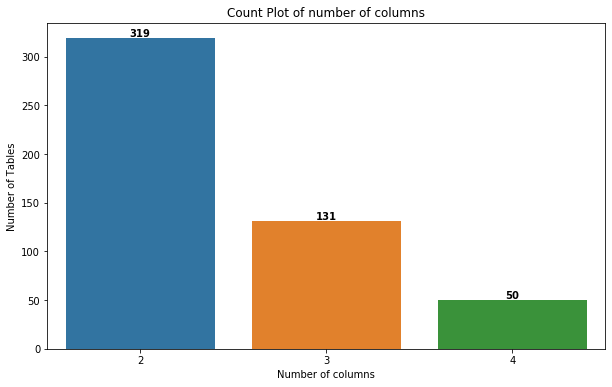

In [8]:
no_columns_per_table = {
    "table": [],
    "number_of_columns": []
}

for index, key in enumerate(dfs):
    no_columns_per_table["table"].append(key)
    no_columns_per_table["number_of_columns"].append(dfs[key].shape[1])
    
no_columns_per_table = pd.DataFrame(no_columns_per_table)
no_columns_per_table.head()

# Plotting the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=no_columns_per_table, x='number_of_columns')

# Adding labels and title
plt.xlabel('Number of columns')
plt.ylabel('Number of Tables')
plt.title('Count Plot of number of columns')


# Calculate and add total count above each bar
total_counts = no_columns_per_table['number_of_columns'].value_counts().sort_index()
for index, count in enumerate(total_counts):
    plt.text(index, count, str(count), ha='center', va='bottom', fontweight='bold')


# Display the plot
plt.show()

### Types of Columns

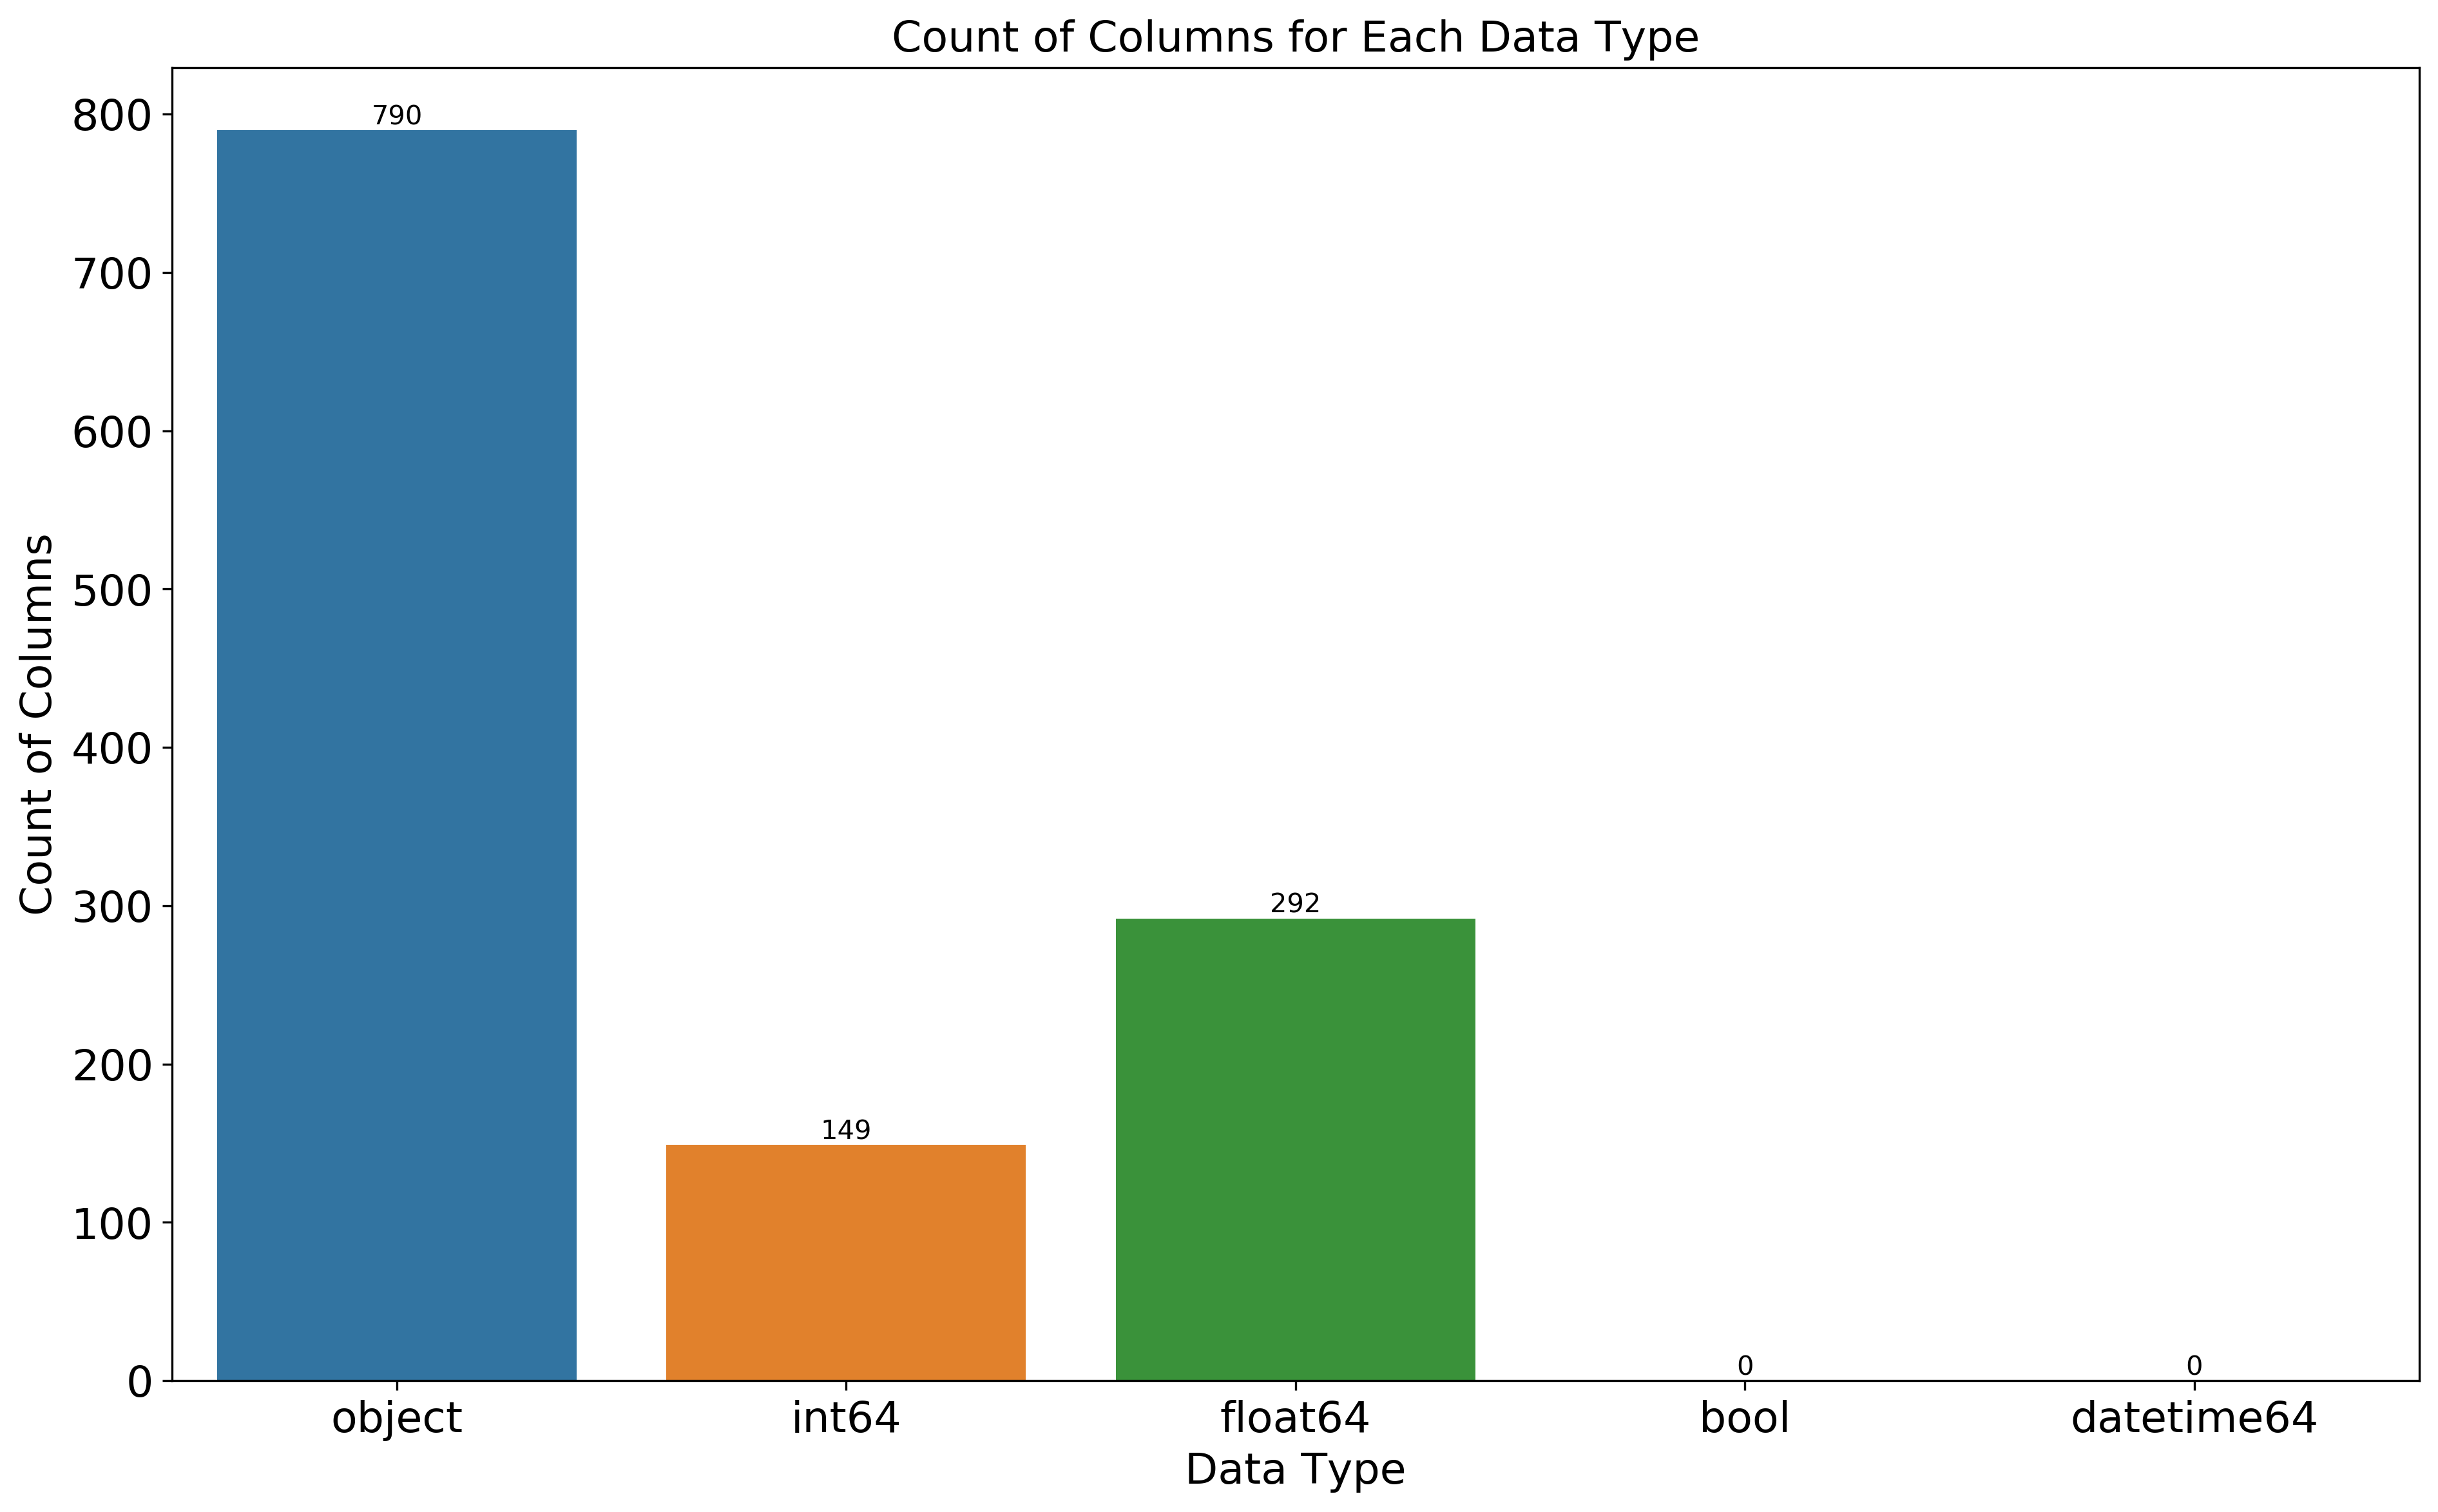

In [9]:
# See the types of the columns
columns_types_count = {
    "object": 0,
    "int64": 0,
    "float64": 0,
    "bool": 0,
    "datetime64": 0
}

for index, key in enumerate(dfs):
    types = dfs[key].dtypes.tolist()
    for column_type in types:
        if column_type == "object":
            columns_types_count['object'] = columns_types_count['object'] + 1
        elif column_type == "float64":
            columns_types_count['float64'] = columns_types_count['float64'] + 1
        elif column_type == "int64":
            columns_types_count['int64'] = columns_types_count['int64'] + 1
        elif column_type == "bool":
            columns_types_count['bool'] = columns_types_count['bool'] + 1
        elif column_type == "datetime64":
            columns_types_count['datetime64'] = columns_types_count['datetime64'] + 1
  
columns_types_count = pd.DataFrame({
    'object': [columns_types_count['object']],
    'int64': [columns_types_count['int64']],
    'float64': [columns_types_count['float64']],
    'bool': [columns_types_count['bool']],
    'datetime64': [columns_types_count['datetime64']],
})
columns_types_count.head()

# Transpose the DataFrame
df_transposed = columns_types_count.transpose()

# Reset the index and rename the columns
df_transposed = df_transposed.reset_index()
df_transposed.columns = ['Data Type', 'Count']

# Plotting the bar plot using Seaborn
plt.figure(figsize=(15, 9), dpi=300)
sns.barplot(data=df_transposed, x='Data Type', y='Count')

# Adding labels and title
plt.xlabel('Data Type', fontsize=16)
plt.ylabel('Count of Columns', fontsize=16)
plt.title('Count of Columns for Each Data Type', fontsize=16)


# Adjusting the font size of tick labels on x-axis and y-axis
plt.xticks(fontsize=16)  # Adjust the font size as needed
plt.yticks(fontsize=16)  # Adjust the font size as needed

# Annotating the bar plot with exact numbers
for index, row in df_transposed.iterrows():
    plt.text(index, row['Count'], str(row['Count']), ha='center', va='bottom')


# Display the plot
plt.show()

### Missing Values

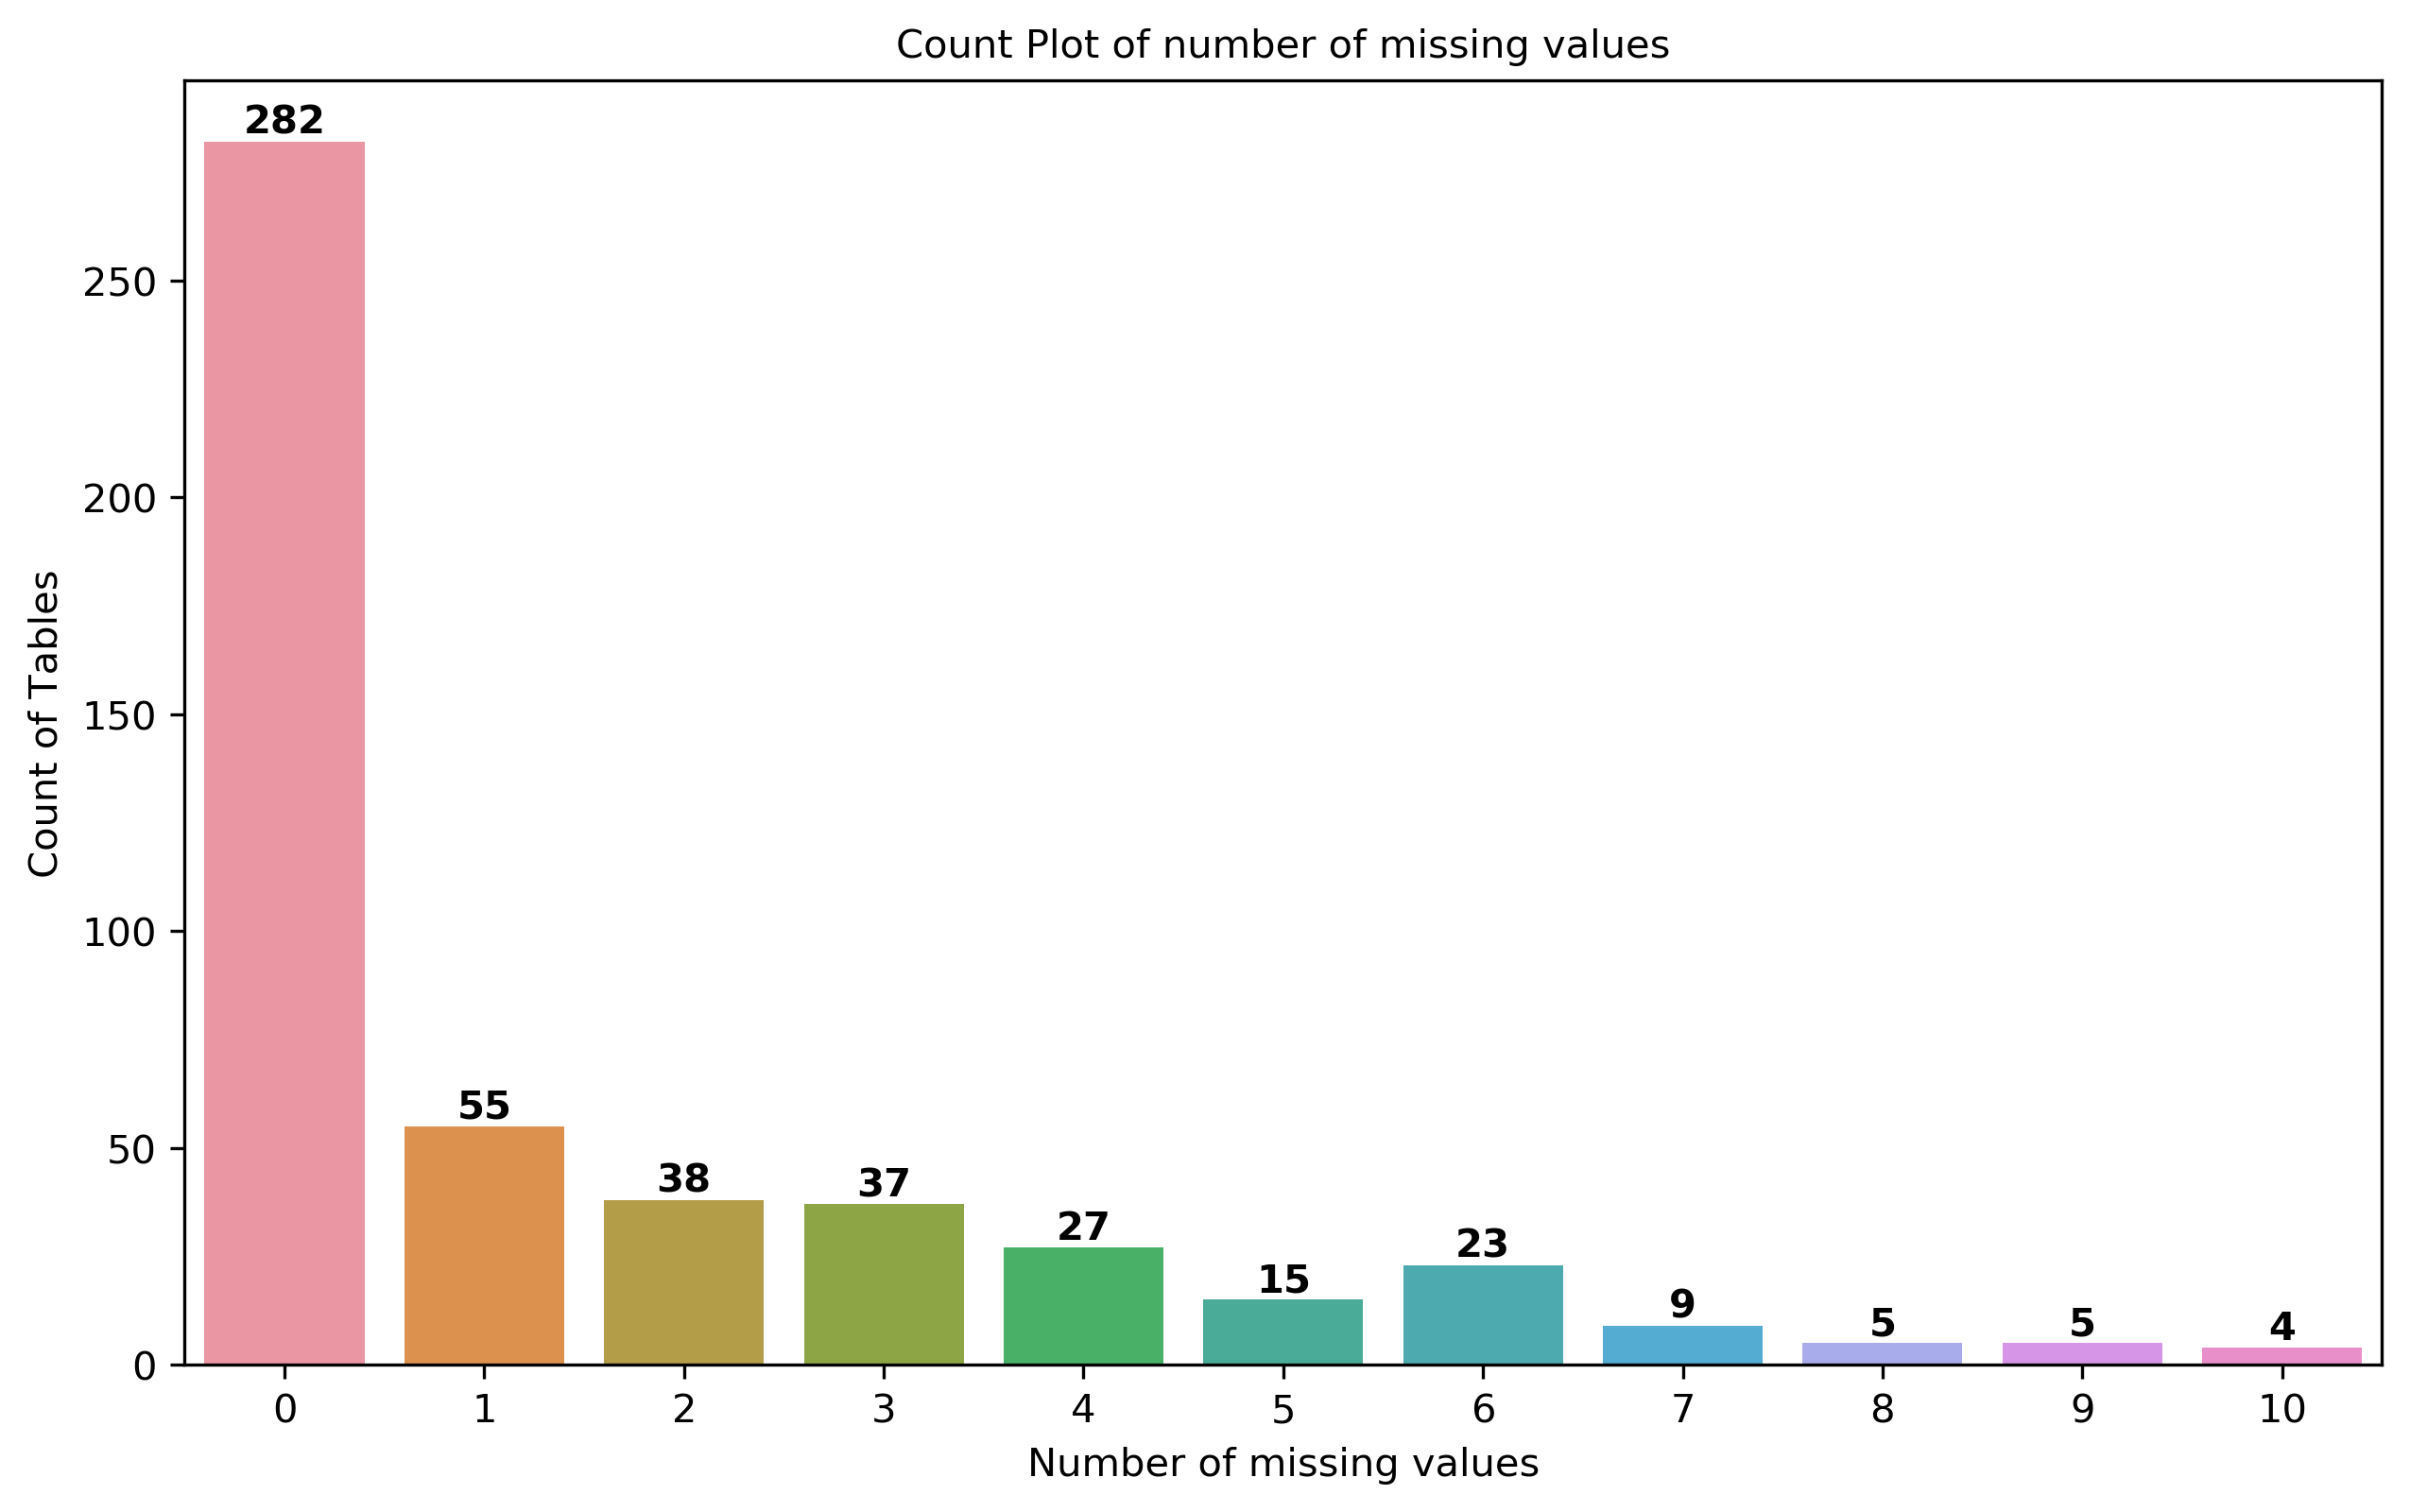

In [12]:
# How many missing values per table
no_missing_values_per_table = {
    "table": [],
    "number_of_missing_values": []
}

for index, key in enumerate(dfs):
    no_missing_values_per_table["table"].append(key)
    
    # Count the number of missing values in each column
    missing_values = dfs[key].isnull().sum()

    # Total number of missing values in the entire dataframe
    total_missing = missing_values.sum()
    
    no_missing_values_per_table["number_of_missing_values"].append(total_missing)
    
no_missing_values_per_table = pd.DataFrame(no_missing_values_per_table)
no_missing_values_per_table.head()

# Plotting the count plot
plt.figure(figsize=(10, 6), dpi=300)
sns.countplot(data=no_missing_values_per_table, x='number_of_missing_values')

# Adding labels and title
plt.xlabel('Number of missing values', fontSize=10)
plt.ylabel('Count of Tables', fontSize=10)
plt.title('Count Plot of number of missing values', fontSize=10)

# Adjusting the font size of tick labels on x-axis and y-axis
plt.xticks(fontsize=10)  # Adjust the font size as needed
plt.yticks(fontsize=10)  # Adjust the font size as needed

# Calculate and add total count above each bar
total_counts = no_missing_values_per_table['number_of_missing_values'].value_counts().sort_index()
for index, count in enumerate(total_counts):
    plt.text(index, count, str(count), ha='center', va='bottom', fontweight='bold')

# Display the plot
plt.show()

In [378]:
no_missing_values_per_table[no_missing_values_per_table["number_of_missing_values"] > 0].number_of_missing_values.sum()

751

In [379]:
total_number_missing_values = no_missing_values_per_table[no_missing_values_per_table["number_of_missing_values"] > 0].number_of_missing_values.sum()
print(f"Total number of missing values is: {total_number_missing_values}")

Total number of missing values is: 751


## Does they annotate the NaN values ? 

In [17]:
# Does the missing values are annotated ?
eg_1_table = no_missing_values_per_table[no_missing_values_per_table["number_of_missing_values"] > 0].table.values[1]
eg_2_table = no_missing_values_per_table[no_missing_values_per_table["number_of_missing_values"] > 0].table.values[4]
print(eg_1_table)
print(eg_2_table)

0JGLUKC7.csv
0WPFA2SX.csv


In [18]:
dfs[eg_1_table]

,col0,col1
0,Green Man,NaN
1,Nanny,Walt Simonson
2,Cyborg,Marv Wolfman
3,Cyborg,Chris Terrio


In [19]:
dfs[eg_2_table]

,col0,col1,col2,col3
0,Design for an altar crown,paper,King Baudouin Foundation,Heritage Fund
1,Design for a Virgin Mary,pencil,Cuypershuis,NaN
2,Design for an altar,NaN,King Baudouin Foundation,Heritage Fund
3,Design for an altar,NaN,Collection Van Herck,Alfons Van Herck
4,Design for a Female Saint,pencil,Cuypershuis,NaN
5,Design for a door ornament with putti,NaN,Collection Van Herck,Alfons Van Herck
6,Design for a door ornament with putti,NaN,Collection Van Herck,Alfons Van Herck


In [20]:
cea_targets = pd.read_csv('Dataset/Valid/gt/cea_gt.csv', header=None)
cea_targets.head()

,0,1,2,3
0,IUPOCN5C,1,0,http://www.wikidata.org/entity/Q6386554
1,IUPOCN5C,2,0,http://www.wikidata.org/entity/Q6500028
2,BQC7DZZR,1,0,http://www.wikidata.org/entity/Q4975221
3,BQC7DZZR,2,0,http://www.wikidata.org/entity/Q7996163
4,BQC7DZZR,3,0,http://www.wikidata.org/entity/Q6858435


In [21]:
cea_targets[cea_targets[0] == "0JGLUKC7"]

,0,1,2,3
652,0JGLUKC7,1,0,http://www.wikidata.org/entity/Q3776323
653,0JGLUKC7,2,0,http://www.wikidata.org/entity/Q111550382
654,0JGLUKC7,2,1,http://www.wikidata.org/entity/Q675791
655,0JGLUKC7,3,0,http://www.wikidata.org/entity/Q2466726
656,0JGLUKC7,3,1,http://www.wikidata.org/entity/Q1333734
657,0JGLUKC7,4,0,http://www.wikidata.org/entity/Q57394189
658,0JGLUKC7,4,1,http://www.wikidata.org/entity/Q3208159


In [22]:
cea_targets[cea_targets[0] == "0WPFA2SX"]

,0,1,2,3
3003,0WPFA2SX,1,0,http://www.wikidata.org/entity/Q59097177
3004,0WPFA2SX,1,1,http://www.wikidata.org/entity/Q11472
3005,0WPFA2SX,1,2,http://www.wikidata.org/entity/Q2780100
3006,0WPFA2SX,1,3,http://www.wikidata.org/entity/Q47458848
3007,0WPFA2SX,2,0,http://www.wikidata.org/entity/Q55693869
3008,0WPFA2SX,2,1,http://www.wikidata.org/entity/Q14674
3009,0WPFA2SX,2,2,http://www.wikidata.org/entity/Q15874141
3010,0WPFA2SX,3,0,http://www.wikidata.org/entity/Q59098216
3011,0WPFA2SX,3,2,http://www.wikidata.org/entity/Q2780100
3012,0WPFA2SX,3,3,http://www.wikidata.org/entity/Q47458848


In [23]:
# To correct
count = no_missing_values_per_table[no_missing_values_per_table["number_of_missing_values"] > 0].shape[0]
print(f"Percentage of tables in Valid dataset that has at least one missing value: {(count/len(dfs)) * 100}%")

Percentage of tables in Valid dataset that has at least one missing value: 43.6%


### Languages used in cells using Langid Python package

{'cy': 5, 'sv': 57, 'en': 2626, 'et': 52, 'pl': 62, 'cs': 34, 'es': 216, 'eu': 17, 'id': 50, 'de': 436, 'fr': 167, 'gl': 13, 'pt': 65, 'it': 99, 'tl': 8, 'ca': 29, 'zh': 3, 'fi': 53, 'da': 37, 'nl': 80, 'mt': 12, 'hr': 5, 'lt': 36, 'az': 1, 'no': 9, 'lv': 5, 'ro': 31, 'sl': 32, 'sq': 3, 'xh': 5, 'br': 2, 'tr': 10, 'sk': 24, 'la': 8, 'hu': 14, 'wa': 1, 'nn': 2, 'mg': 3, 'nb': 3, 'eo': 5, 'ms': 5, 'af': 3, 'ht': 3, 'vi': 6, 'is': 2, 'rw': 5, 'ta': 1, 'sw': 2, 'vo': 2, 'oc': 1, 'ja': 1, 'qu': 1, 'ar': 1, 'ga': 1}


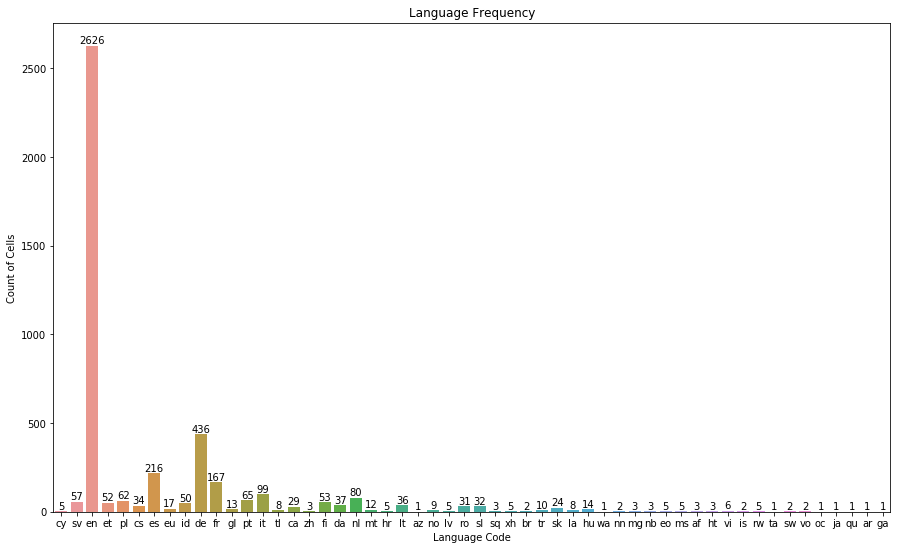

In [24]:
# See the languages of the columns for all cells
languages_count = {}

for index, key in enumerate(dfs):
    df = dfs[key]
    columns = df.columns.tolist()
    for col in columns:
        if df[col].dtype == 'object':
            for value in df[col].dropna().values:
                detected_language, _ = langid.classify(value)
                if detected_language in languages_count.keys():
                    languages_count[detected_language] = languages_count[detected_language] + 1
                else:
                    languages_count[detected_language] = 1
    
print(languages_count)

# Transform each value into a list
languages_count = {key: [value] for key, value in languages_count.items()}
    
languages_count = pd.DataFrame(languages_count)

# Transpose the DataFrame
df_transposed = languages_count.transpose()

# Reset the index and rename the columns
df_transposed = df_transposed.reset_index()
df_transposed.columns = ['Language Code', 'Count']

# Plotting the bar plot using Seaborn
plt.figure(figsize=(15, 9))
sns.barplot(data=df_transposed, x='Language Code', y='Count')

# Adding labels and title
plt.xlabel('Language Code')
plt.ylabel('Count of Cells')
plt.title('Language Frequency')

# Annotating the bar plot with exact numbers
for index, row in df_transposed.iterrows():
    plt.text(index, row['Count'], str(row['Count']), ha='center', va='bottom')


# Display the plot
plt.show()

In [25]:
cea_targets

,0,1,2,3
0,IUPOCN5C,1,0,http://www.wikidata.org/entity/Q6386554
1,IUPOCN5C,2,0,http://www.wikidata.org/entity/Q6500028
2,BQC7DZZR,1,0,http://www.wikidata.org/entity/Q4975221
3,BQC7DZZR,2,0,http://www.wikidata.org/entity/Q7996163
4,BQC7DZZR,3,0,http://www.wikidata.org/entity/Q6858435
...,...,...,...,...
4242,AMTEIF56,2,1,http://www.wikidata.org/entity/Q15981425
4243,AMTEIF56,3,0,http://www.wikidata.org/entity/Q12716967
4244,AMTEIF56,3,1,http://www.wikidata.org/entity/Q15973993
4245,AMTEIF56,4,0,http://www.wikidata.org/entity/Q6923695


{'en': 2523, 'fr': 167, 'da': 36, 'es': 216, 'de': 433, 'et': 52, 'tr': 10, 'ca': 29, 'pt': 65, 'sq': 3, 'pl': 62, 'id': 50, 'sv': 57, 'hu': 14, 'fi': 53, 'nl': 80, 'mt': 12, 'lt': 36, 'it': 99, 'xh': 5, 'tl': 8, 'gl': 13, 'sl': 32, 'br': 2, 'vo': 2, 'vi': 6, 'cs': 34, 'ar': 1, 'ga': 1, 'rw': 5, 'mg': 3, 'hr': 5, 'lv': 5, 'la': 8, 'ro': 31, 'no': 9, 'ms': 5, 'sk': 24, 'ht': 3, 'eu': 17, 'qu': 1, 'sw': 2, 'ta': 1, 'nn': 2, 'wa': 1, 'eo': 5, 'zh': 3, 'nb': 3, 'af': 3, 'is': 2, 'oc': 1, 'cy': 5, 'ja': 1, 'az': 1}


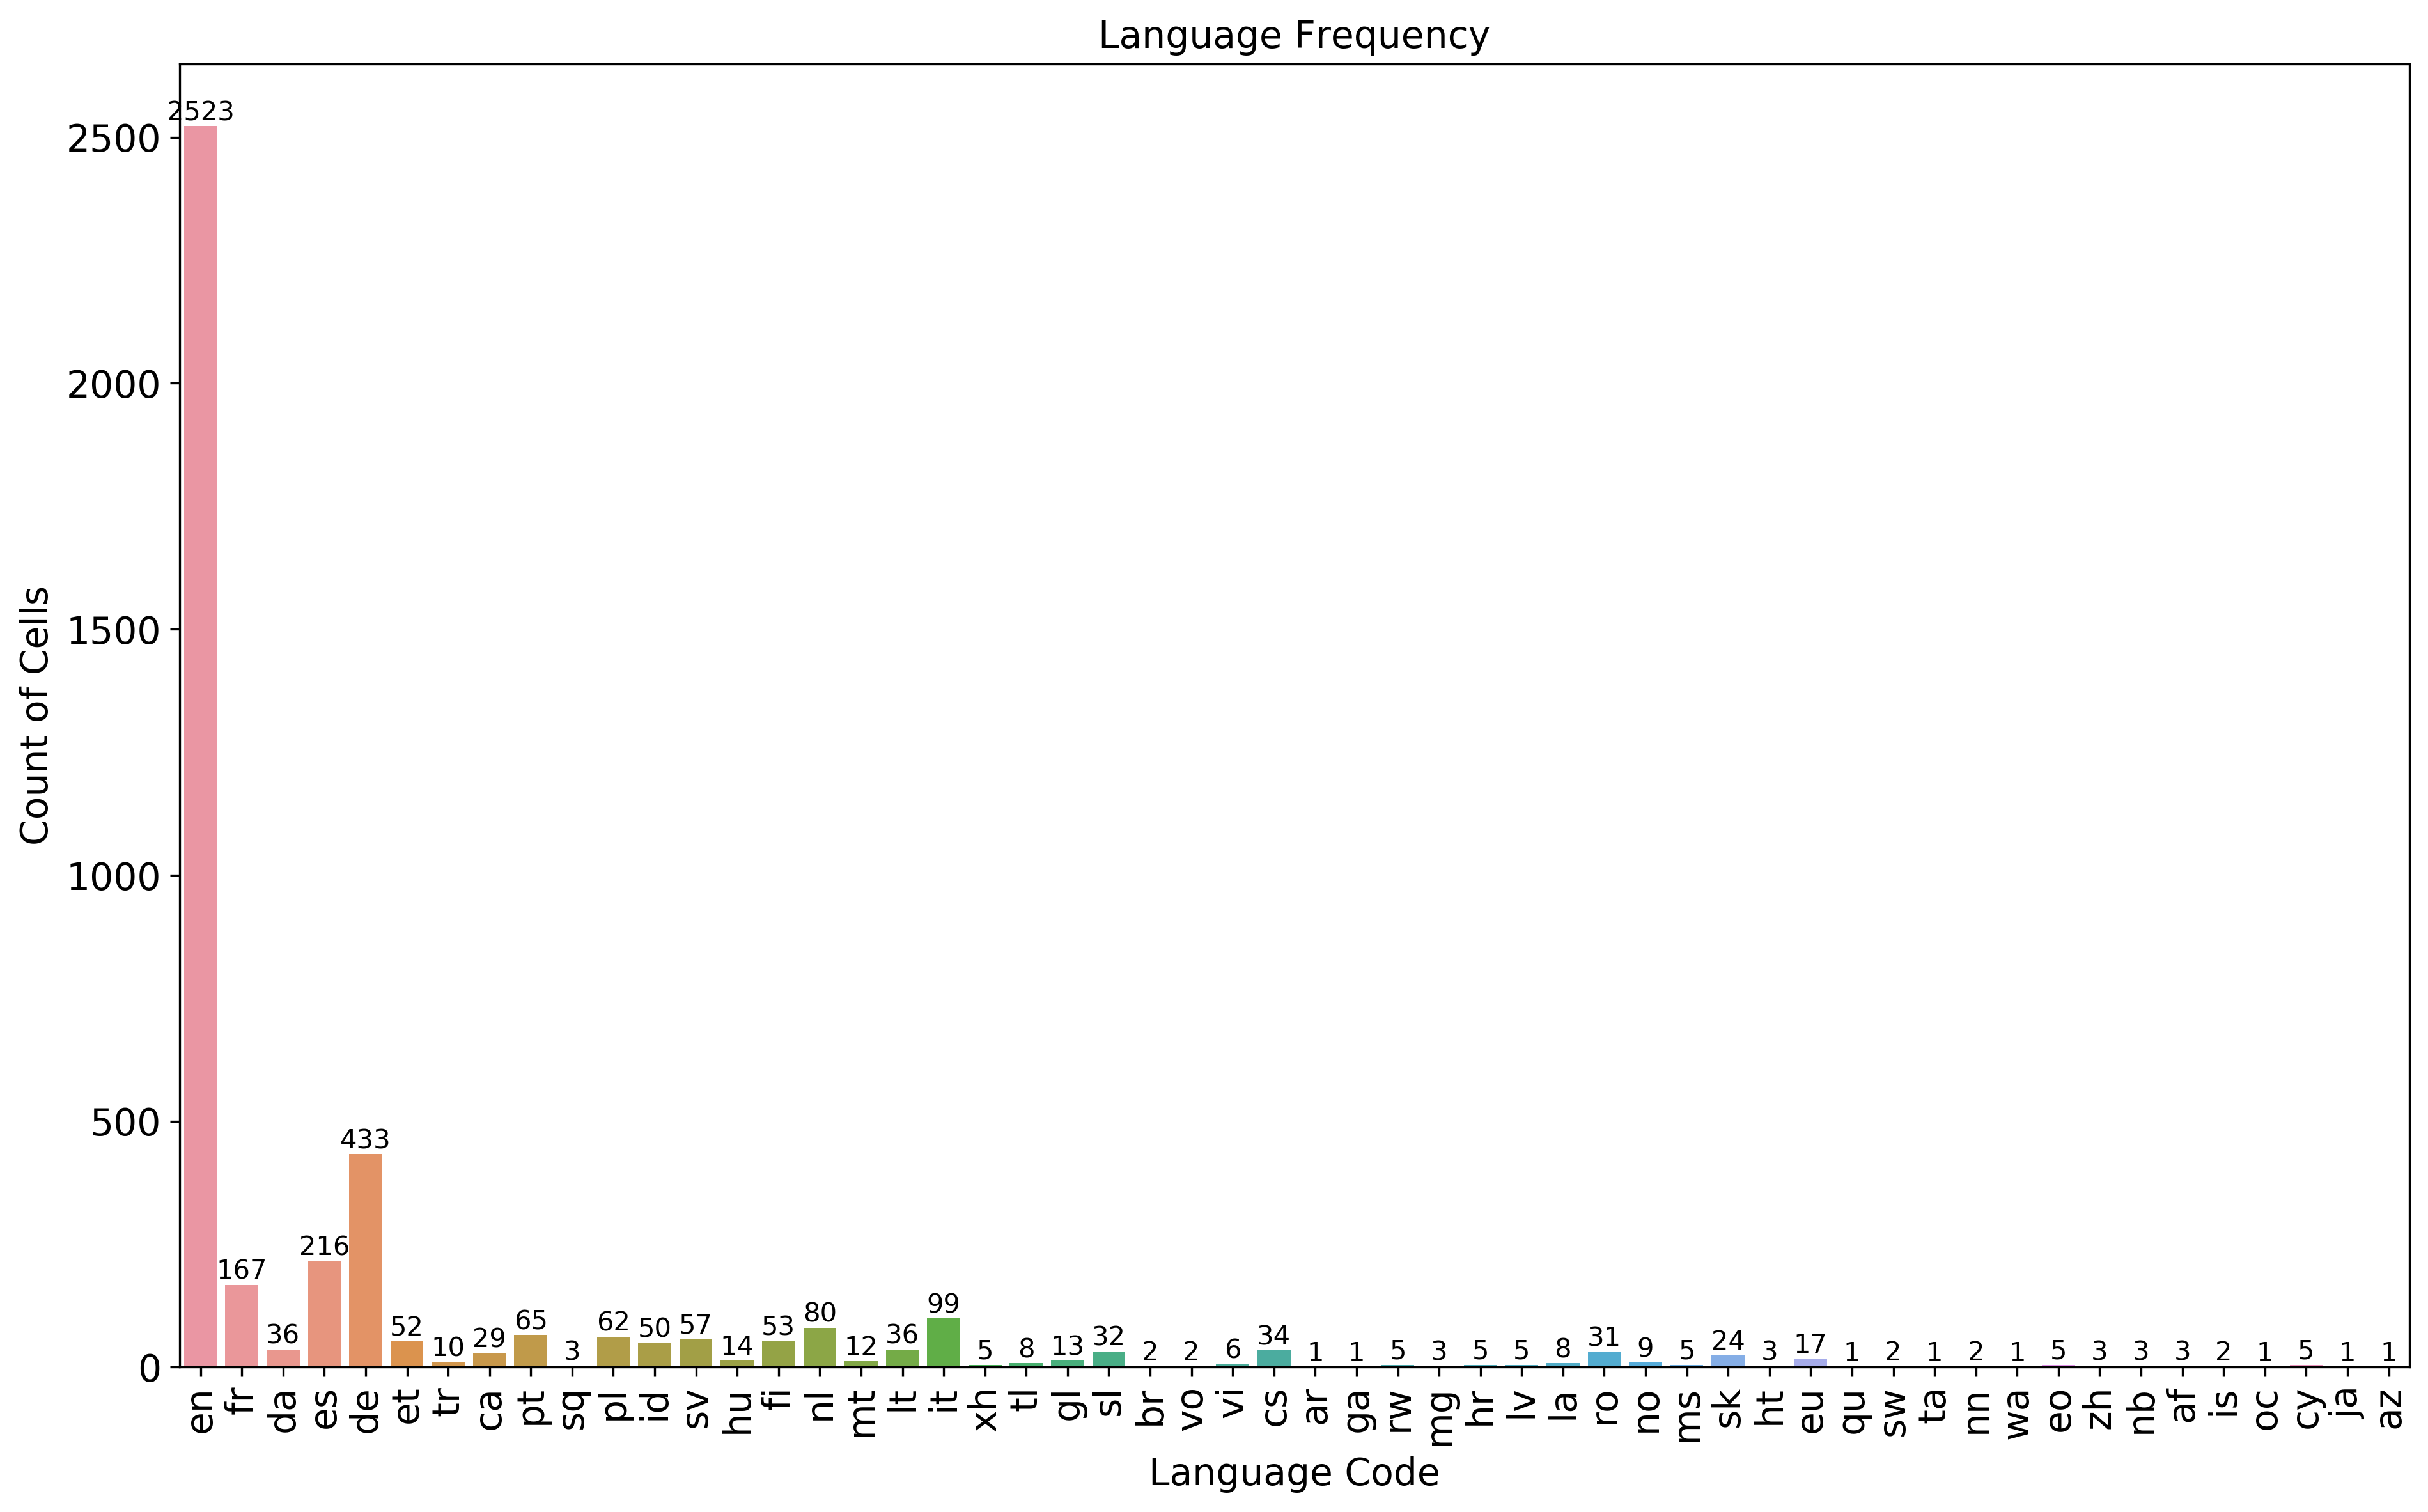

In [33]:
# See the languages of the CEA cells
languages_count = {}

for index, row in cea_targets.iterrows():
    df = dfs[row[0] + '.csv']
    value = df.iloc[row[1] - 1, row[2]]
    detected_language, _ = langid.classify(value)
    if detected_language in languages_count.keys():
        languages_count[detected_language] = languages_count[detected_language] + 1
    else:
        languages_count[detected_language] = 1

print(languages_count)

# Transform each value into a list
languages_count = {key: [value] for key, value in languages_count.items()}
    
languages_count = pd.DataFrame(languages_count)

# Transpose the DataFrame
df_transposed = languages_count.transpose()

# Reset the index and rename the columns
df_transposed = df_transposed.reset_index()
df_transposed.columns = ['Language Code', 'Count']

# Plotting the bar plot using Seaborn
plt.figure(figsize=(15, 9), dpi=300)
sns.barplot(data=df_transposed, x='Language Code', y='Count')

# Adding labels and title
plt.xlabel('Language Code', fontSize=14)
plt.ylabel('Count of Cells', fontSize=14)
plt.title('Language Frequency', fontSize=14)

# Adjusting the font size of tick labels on x-axis and y-axis
plt.xticks(rotation=90, fontsize=14)  # Adjust the font size as needed
plt.yticks(fontsize=14)  # Adjust the font size as needed

# Annotating the bar plot with exact numbers
for index, row in df_transposed.iterrows():
    plt.text(index, row['Count'], str(row['Count']), ha='center', va='bottom')


# Display the plot
plt.show()

In [27]:
languages_count.columns
non_english_count = 0
for col in languages_count.columns:
    if col != 'en':
        non_english_count = non_english_count + languages_count[col]
print(f"Total number of cells with non-english content is: {non_english_count.values[0]}")
print(f"Percentage of cells with non-english content is: {(non_english_count.values[0]/cea_gt.shape[0]) * 100}%")


Total number of cells with non-english content is: 1724
Percentage of cells with non-english content is: 40.593360018836826%


In [28]:
!pip install langid

In [29]:
# Example of cells with non-english content
non_english_values = {}
for index, row in cea_targets.iterrows():
    df = dfs[row[0] + '.csv']
    value = df.iloc[row[1] - 1, row[2]]
    detected_language, _ = langid.classify(value)
    if detected_language != "en":
        if detected_language not in non_english_values.keys():
            non_english_values[detected_language] = [value]
        else:
            non_english_values[detected_language].append(value)

In [30]:
print("Examples of French cells:")
print(non_english_values['fr'][:10])
print("Examples of German cells:")
print(non_english_values['de'][:10])
print("Examples of Spanish cells:")
print(non_english_values['es'][:10])
print("Examples of Chinesse cells:")
print(non_english_values['zh'][:10])
print("Examples of Japanese cells:")
print(non_english_values['ja'][:10])

Examples of French cells:
['Brookville Township', 'Greenville Township', 'Princeton Township', 'Valcartier A', 'Valcartier A', 'Orleans County', 'Nassau County', 'Wampsville', 'Le Haut-Saint-Laurent', 'Nassau County']
Examples of German cells:
['Warren Township', 'Warren Township', 'Mas Blau', 'Jangsan Station', 'Xiaonanmen Station', 'Pavones', 'Bilster Berg', 'Steuben County', 'Riverhead', 'Norwich']
Examples of Spanish cells:
['Ohio Township', 'Ohio Township', 'Ohio Township', 'Florida Township', 'La Belle', 'Beacon Hill', 'San Juan de Dios', 'Oneida County', 'Ontario County', 'Ontario County']
Examples of Chinesse cells:
['Țomcutu Mic', 'Cuypershuis', 'Cuypershuis']
Examples of Japanese cells:
['UTC−05:00']
